First 5 rows:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4  

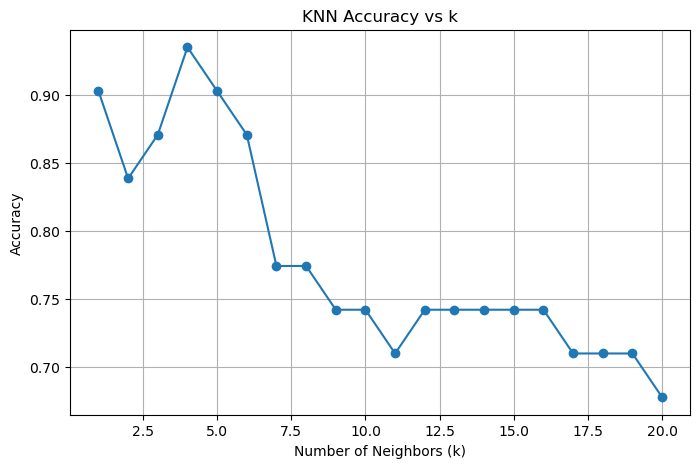


Confusion Matrix:
 [[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31

Final Accuracy: 0.9355

Predicted Class for new animal: 4


In [3]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 2. Load dataset
file_path = "Zoo.csv" 
df = pd.read_csv(file_path)

# 3. Explore data
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nClass Distribution:\n", df['type'].value_counts())

# 4. Split features and target
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Find best k using accuracy
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest k: {best_k} with accuracy: {max(accuracy_scores):.4f}")

# 8. Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.grid(True)
plt.show()

# 9. Train final model with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# 10. Predictions
y_pred_final = knn_final.predict(X_test_scaled)

# 11. Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, zero_division=0))

print(f"Final Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")

# 12. Predict for new animal
new_animal = pd.DataFrame([[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]],
                           columns=X.columns)

new_animal_scaled = scaler.transform(new_animal)
prediction = knn_final.predict(new_animal_scaled)
print("\nPredicted Class for new animal:", prediction[0])


In [14]:
#Interview Questions:

1. What are the key hyperparameters in KNN?

The main hyperparameters that affect KNN performance are:

n_neighbors (k)

Number of nearest neighbors to consider for voting.

Smaller k → high variance, low bias (overfitting).

Larger k → high bias, low variance (underfitting).

metric (Distance Metric)

Defines how distance between points is measured.

Common: euclidean, manhattan, minkowski, chebyshev.

weights

How neighbors influence the prediction:

"uniform" → all neighbors have equal weight.

"distance" → closer neighbors have more influence.

algorithm

Method to compute nearest neighbors:

"auto" (chooses best),

"ball_tree", "kd_tree", "brute".

p (for Minkowski distance)

If p=1 → Manhattan distance.

If p=2 → Euclidean distance.

 
 
2. What distance metrics can be used in KNN?

KNN relies on distance metrics to measure similarity between points. Common ones:

Euclidean Distance (default for p=2)

𝑑
(
𝑥
,
𝑦
)
=
∑
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d(x,y)=
∑(x
i
	​

−y
i
	​

)
2
	​


Best for continuous data.

Manhattan Distance (for p=1)

𝑑
(
𝑥
,
𝑦
)
=
∑
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d(x,y)=∑∣x
i
	​

−y
i
	​

∣

Good for high-dimensional sparse data.

Minkowski Distance
Generalized form of Euclidean & Manhattan.

Chebyshev Distance

𝑑
(
𝑥
,
𝑦
)
=
max
⁡
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d(x,y)=max∣x
i
	​

−y
i
	​

∣

Measures maximum difference in any dimension.

Hamming Distance

For categorical data (counts mismatched positions).

Cosine Similarity (used in some KNN variations)

Measures angle between vectors, useful for text data.

Dataset Shape: (101, 18)

First 5 rows:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1

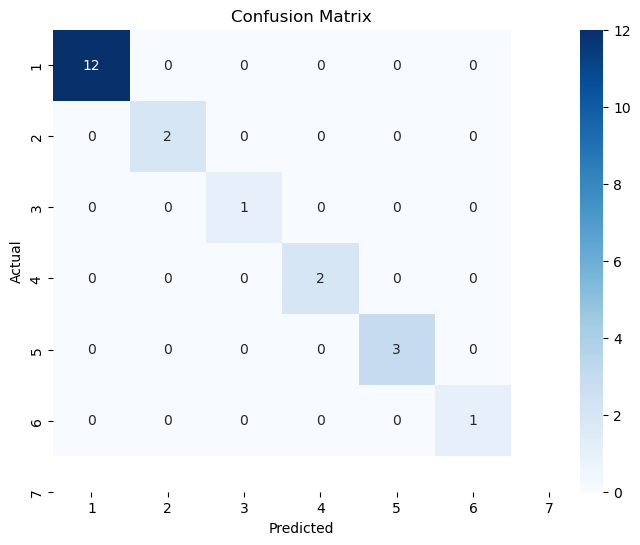

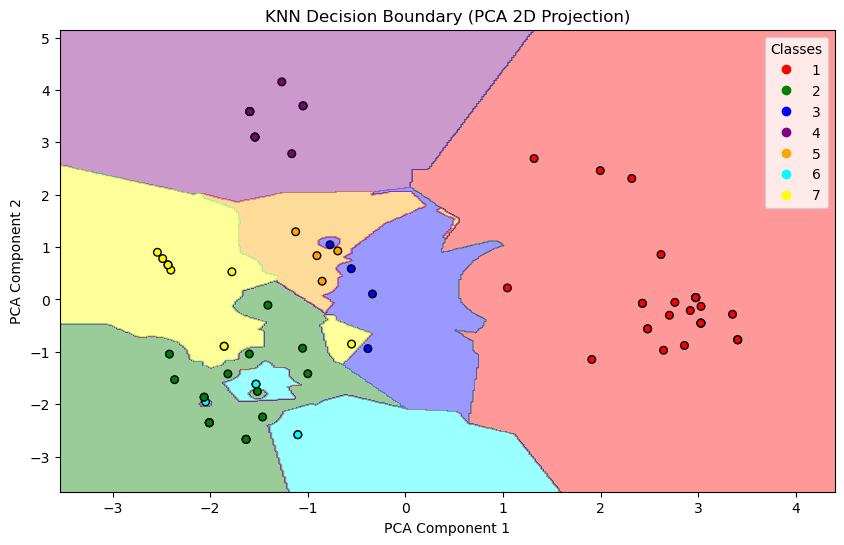

In [3]:
# KNN Assignment on Zoo Dataset with Decision Boundary Visualization

# -------------------------------
# 1. Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# -------------------------------
# 2. Load the Zoo Dataset
# -------------------------------
data = pd.read_csv('Zoo.csv')
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())

# -------------------------------
# 3. Data Preprocessing
# -------------------------------
# Separate features and target
X = data.drop(['animal name', 'type'], axis=1)
y = data['type']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 4. KNN Model Training with Hyperparameter Tuning
# -------------------------------
# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Train the best model
best_knn = grid_search.best_estimator_

# -------------------------------
# 5. Model Evaluation
# -------------------------------
y_pred = best_knn.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 6. Decision Boundary Visualization using PCA (2D)
# -------------------------------
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit model on PCA data
best_knn.fit(X_train_pca, y_train)

# Create decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue', 'purple', 'orange', 'cyan', 'yellow')))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=30, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue', 'purple', 'orange', 'cyan', 'yellow')))
plt.title("KNN Decision Boundary (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?



1. What are the key hyperparameters in KNN?

The main hyperparameters in K-Nearest Neighbors (KNN) are:

n_neighbors:
The number of nearest neighbors to consider for classification or regression.

weights:
How to weight the neighbors' votes:

"uniform" → All neighbors have equal weight.

"distance" → Closer neighbors have higher influence.

metric:
The distance metric used to compute the distance between points (e.g., Euclidean, Manhattan, Minkowski).

p:
Power parameter for the Minkowski metric:

p = 1 → Manhattan distance

p = 2 → Euclidean distance

algorithm:
The method used to compute nearest neighbors:

"auto", "ball_tree", "kd_tree", "brute".

leaf_size (if using Ball Tree or KD Tree):
Affects the speed and memory of the tree construction.

2. What distance metrics can be used in KNN?

Common distance metrics used in KNN:

Euclidean Distance (default for continuous data):

𝑑
=
∑
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d=
∑(x
i
	​

−y
i
	​

)
2
	​


Manhattan Distance:

𝑑
=
∑
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d=∑∣x
i
	​

−y
i
	​

∣

Minkowski Distance (generalization of Euclidean and Manhattan):

𝑑
=
(
∑
∣
𝑥
𝑖
−
𝑦
𝑖
∣
𝑝
)
1
/
𝑝
d=(∑∣x
i
	​

−y
i
	​

∣
p
)
1/p

Chebyshev Distance:

𝑑
=
max
⁡
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d=max∣x
i
	​

−y
i
	​

∣

Hamming Distance (for categorical/binary features).

Cosine Similarity/Distance (used for text and high-dimensional data).